In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


## EDA

In [9]:
# User ID yi düşürüyorum modelimizde işimize yaramaz
df.drop("User ID", axis=1, inplace= True)
df.head(1)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [12]:
# Gender (Cinsiyet) verimizi makine öğreniminin kabul edeceği şekile (int) getirdim
map_gender = {
    "Female" :0,
    "Male" : 1
    }
df["Gender"] = df["Gender"].map(map_gender)
df.head(2)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0


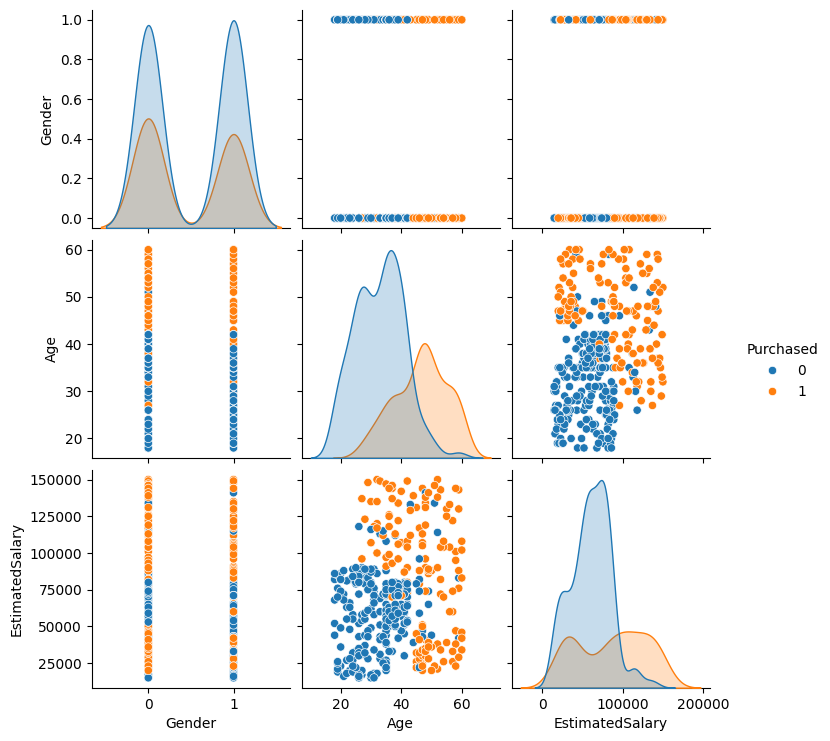

In [19]:
sns.pairplot(data=df, hue="Purchased")

In [21]:
# Kadin olup satin alanlar
kpurchased = len(df[(df["Gender"] == 0) & (df["Purchased"] == 1)])
kpurchased

77

In [22]:
epurchased = len(df[(df["Gender"] == 1) & (df["Purchased"] == 1)])
epurchased

66

In [23]:
# Modeli Oluşturalım

## Train Test Split & Standart Scaler

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
X = df.drop("Purchased", axis=1)
y = df["Purchased"]

In [26]:
len(df) # Toplam 400 verimiz var 0.3 seçeceğim test size ı 

400

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [28]:
# Standart scaler KNN de de Logistic Regr da olduğu gibi önemli orada yaptığımızın aynısını yapacağız

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Modelimizi Oluşturalım

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Burada modelimizi oturtma kısmındayız bizim için KNN de önemli olan n_neighbours ( K ) değerini şuanda kendim belirleyeceğim aşşağıda en iyi K değerini bulmak için bir döngü kuracağız

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [33]:
test_pred = knn.predict(scaled_X_test)

## Metrikler

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

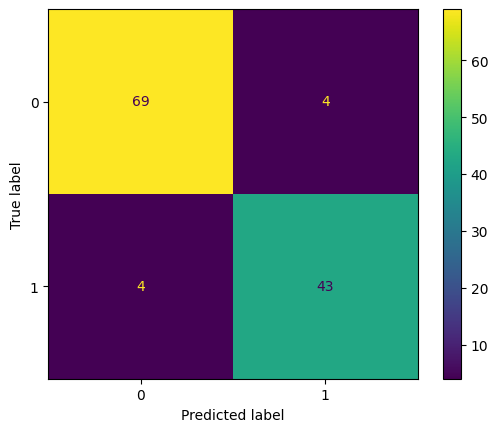

In [35]:
ConfusionMatrixDisplay.from_estimator(knn, scaled_X_test, y_test)

In [36]:
print(classification_report(test_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        73
           1       0.91      0.91      0.91        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



## En İyi Komşu Sayısı

In [39]:
from sklearn.metrics import accuracy_score

In [ ]:
# Modelimiz şuanda gayet güzel ama  en iyi parametrelerle nasıl olacak bakalım

In [40]:
hata_orani = []

for k in range(1, 40): 
    knn= KNeighborsClassifier(n_neighbors= k)
    knn.fit(scaled_X_train, y_train)
    predd = knn.predict(scaled_X_test)

    err = 1 - accuracy_score(predd, y_test)
    hata_orani.append(err)

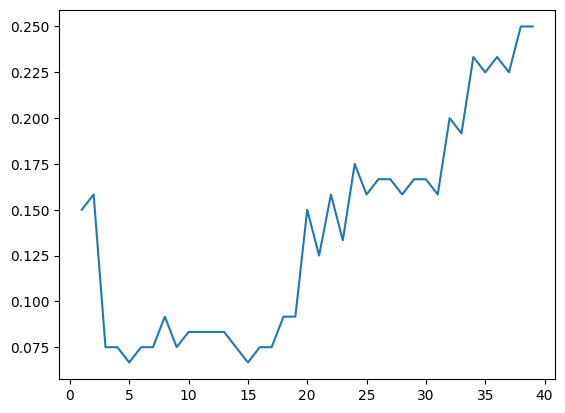

In [41]:
plt.plot(range(1, 40), hata_orani)  
# 5 te zaten gayet güzel çalışıyormuş 15 te güzelmiş 

# Bunu GridSearch ile en iyisni bulup modele otruttuğu için direk onunla da deneyebilirz 

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
knn = KNeighborsClassifier()

n_neighbours = range(1, 30)

In [50]:
grid = GridSearchCV(knn, param_grid={
    "n_neighbors" : n_neighbours
    })
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30)})

In [51]:
grid.best_params_

{'n_neighbors': 9}

In [52]:
grid_pred = grid.predict(scaled_X_test)

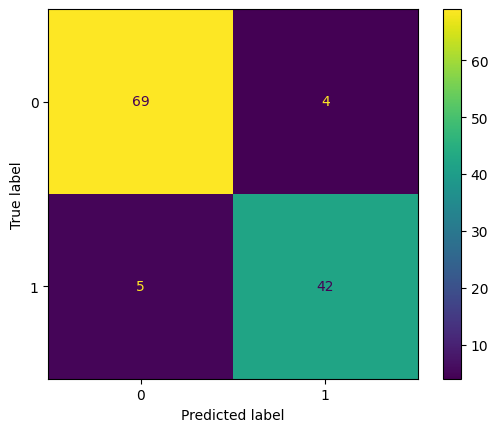

In [53]:
ConfusionMatrixDisplay.from_estimator(grid, scaled_X_test, y_test)

In [56]:
print(classification_report(grid_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        74
           1       0.89      0.91      0.90        46

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.93      0.93      0.93       120

